In [0]:
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data 
#from tensorflow.contrib.rnn import LSTMCell tf.logging.set_verbosity(tf.logging.ERROR) 
from time import time 
from matplotlib.colors import hsv_to_rgb
from scipy.stats import ks_2samp

In [2]:
! git clone https://github.com/EkaterinaPogodina/GANS.git

Cloning into 'GANS'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


## Reading data

In [0]:
apple = data.DataReader('AFI.AX', 'yahoo', start='1/1/2010', end= '1/10/2015')
apple['Returns'] = apple['Adj Close'].pct_change()
# mu = apple['Returns'].mean()
# std = apple['Returns'].std()

### Just looking at original series, not returns

In [0]:
mu = apple['Adj Close'].mean()
std = apple['Adj Close'].std()

In [5]:
mu, std

(5.680612396854925, 0.7699040681456586)

In [0]:
def sample_data(n_samples=50000, seq_length=10):

    vectors = []

    for i in range(n_samples):
        daily_returns=np.random.normal(mu, std, seq_length)
        vectors.append(daily_returns)
    
    return np.asarray(vectors)

In [0]:
def series_from_returns(start, returns):
    res = [start]
    for ret in returns:
        res.append(res[-1]*ret + res[-1])
    return res

In [0]:
samples = sample_data()

In [9]:
samples.mean(), samples.std()

(5.681349246639288, 0.7695009800857481)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  3.,  12.,  19.,  11.,  14.,   5.,  11.,   6.,   8.,   8.,   8.,
          3.,  10., 110., 799., 122.,   9.,   2.,   6.,   9.,   7.,   4.,
          8.,  11.,  13.,  10.,  19.,  13.,   2.,   3.]),
 array([-0.30974917, -0.28842928, -0.26710938, -0.24578949, -0.2244696 ,
        -0.2031497 , -0.18182981, -0.16050992, -0.13919002, -0.11787013,
        -0.09655023, -0.07523034, -0.05391045, -0.03259055, -0.01127066,
         0.01004923,  0.03136913,  0.05268902,  0.07400891,  0.09532881,
         0.1166487 ,  0.13796859,  0.15928849,  0.18060838,  0.20192828,
         0.22324817,  0.24456806,  0.26588796,  0.28720785,  0.30852774,
         0.32984764]),
 <a list of 30 Patch objects>)

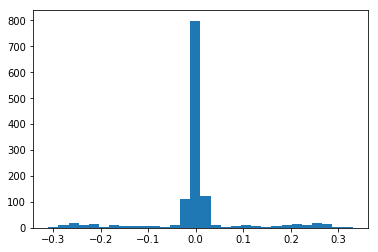

In [10]:
plt.hist(np.log(apple['Returns'] + 1), bins=30)

## WGAN architecture

In [0]:
%load_ext autoreload
%autoreload
from GANS.wgan import WGAN

In [0]:
samples = sample_data()

In [13]:
gan = WGAN(num_epochs=10)

W0828 18:07:00.831944 140019770812288 deprecation_wrapper.py:119] From /content/GANS/gan.py:12: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0828 18:07:00.835236 140019770812288 deprecation_wrapper.py:119] From /content/GANS/dcgan.py:9: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 18:07:00.852919 140019770812288 deprecation_wrapper.py:119] From /content/GANS/dcgan.py:26: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0828 18:07:00.854457 140019770812288 deprecation.py:323] From /content/GANS/dcgan.py:30: conv1d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv1D` instead.
W0828 18:07:00.864805 140019770812288 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__i

In [14]:
gen_samples = gan.train_loop(samples, reshape=True)

epoch: 0 	D_loss: 1.4384882 	G_loss: 0.7454742 	Total_loss: 2.1839623
epoch: 0 	D_loss: 0.9853248 	G_loss: 0.8033811 	Total_loss: 1.7887058
epoch: 1 	D_loss: 1.2692525 	G_loss: 0.61321187 	Total_loss: 1.8824644
epoch: 1 	D_loss: 1.4248215 	G_loss: 0.7473796 	Total_loss: 2.1722012
epoch: 2 	D_loss: 1.4238869 	G_loss: 0.73328584 	Total_loss: 2.1571727
epoch: 2 	D_loss: 1.4202548 	G_loss: 0.72995657 	Total_loss: 2.1502113
epoch: 3 	D_loss: 1.4140694 	G_loss: 0.7280657 	Total_loss: 2.1421351
epoch: 3 	D_loss: 1.4130055 	G_loss: 0.72296304 	Total_loss: 2.1359684
epoch: 4 	D_loss: 1.4100047 	G_loss: 0.71885294 	Total_loss: 2.1288576
epoch: 4 	D_loss: 1.407997 	G_loss: 0.71616626 	Total_loss: 2.1241632
epoch: 5 	D_loss: 1.4042264 	G_loss: 0.7116831 	Total_loss: 2.1159096
epoch: 5 	D_loss: 1.4007871 	G_loss: 0.7087388 	Total_loss: 2.109526
epoch: 6 	D_loss: 1.3985704 	G_loss: 0.70641744 	Total_loss: 2.1049879
epoch: 6 	D_loss: 1.3967681 	G_loss: 0.70385027 	Total_loss: 2.1006184
epoch: 7 	D_lo

Text(0, 0.5, 'loss')

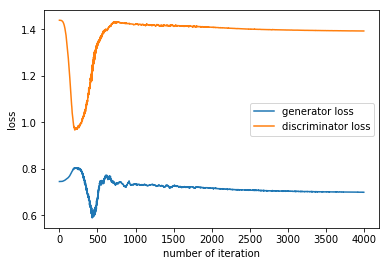

In [15]:
plt.plot(gan.g_loss[:4000])
plt.plot(gan.d_loss[:4000])
plt.legend(['generator loss', 'discriminator loss'])
plt.xlabel('number of iteration')
plt.ylabel('loss')

In [16]:
gen_samples.mean(), gen_samples.std()

(5.656593, 0.8449722)

In [0]:
from scipy import stats

In [20]:
reshaped_gen_samples = gen_samples.reshape(49980, 10)
p_value = np.mean([stats.normaltest(reshaped_gen_samples[i]).pvalue for i in range(1000)])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### Normal test p_value:

In [21]:
p_value

0.5199127224456097

## Seq_length = 50

In [0]:
gan2 = WGAN(num_epochs=10, seq_length=50)

In [24]:
samples50 = sample_data(seq_length=50)
gen_samples50 = gan2.train_loop(samples50, reshape=True)

epoch: 0 	D_loss: 1.517309 	G_loss: 0.8242836 	Total_loss: 2.3415926
epoch: 0 	D_loss: 0.5898601 	G_loss: 1.1620296 	Total_loss: 1.7518897
epoch: 1 	D_loss: 0.9336619 	G_loss: 0.8835047 	Total_loss: 1.8171666
epoch: 1 	D_loss: 1.4830166 	G_loss: 0.7901683 	Total_loss: 2.2731848
epoch: 2 	D_loss: 1.4520278 	G_loss: 0.75805366 	Total_loss: 2.2100816
epoch: 2 	D_loss: 1.4242834 	G_loss: 0.7315332 	Total_loss: 2.1558166
epoch: 3 	D_loss: 1.4126265 	G_loss: 0.71880764 	Total_loss: 2.1314342
epoch: 3 	D_loss: 1.4047801 	G_loss: 0.7116279 	Total_loss: 2.116408
epoch: 4 	D_loss: 1.4001657 	G_loss: 0.70704734 	Total_loss: 2.107213
epoch: 4 	D_loss: 1.3961852 	G_loss: 0.70354456 	Total_loss: 2.0997298
epoch: 5 	D_loss: 1.3941574 	G_loss: 0.7010662 	Total_loss: 2.0952237
epoch: 5 	D_loss: 1.3923734 	G_loss: 0.6993352 	Total_loss: 2.0917087
epoch: 6 	D_loss: 1.3913362 	G_loss: 0.69821453 	Total_loss: 2.0895507
epoch: 6 	D_loss: 1.3905983 	G_loss: 0.69748753 	Total_loss: 2.088086
epoch: 7 	D_loss: 

Text(0, 0.5, 'loss')

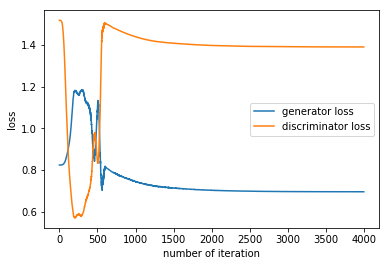

In [25]:
plt.plot(gan2.g_loss[:4000])
plt.plot(gan2.d_loss[:4000])
plt.legend(['generator loss', 'discriminator loss'])
plt.xlabel('number of iteration')
plt.ylabel('loss')

In [0]:
gen_samples50.mean(), gen_samples50.std()

(5.6464725, 0.6295383)

In [26]:
gen_samples50.mean(), gen_samples50.std()

(5.685498, 0.22728209)

In [0]:
samples.mean(), samples.std()

(5.679919324400023, 0.7695282446638582)

In [27]:
all_gen_samples = gen_samples50.reshape(-1, 50)
p_value = np.mean([stats.normaltest(all_gen_samples[i]).pvalue for i in range(1000)])
print("Mean p_value", p_value)

Mean p_value 0.49108301739966714


# Black-Scholes formula

In [0]:
import numpy as np
import scipy.stats as si
# import sympy as sy
# import sympy.statistics as systats

In [0]:
def euro_vanilla_call(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    test = si.norm.cdf(d1, 0.0, 1.0)
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    #print(test, call)
    
    return call

In [0]:
def sample_data_call(n_samples=50000, mean=0, var=2, seq_length=10):

    vectors = []
    s0 = 10
    k = 20
    T = 1
    r = 0.05
    sigma = 0.25
    
    
    for i in range(n_samples):
        vectors.append([])
        for j in range(seq_length):
#             s = np.random.normal(mean, var)
            s = s0 * np.exp((r - 0.5 * sigma**2)*T + sigma * np.sqrt(T) * np.random.normal(0, 1))
            params = [s, k, T, r, sigma]
            vectors[-1].append(euro_vanilla_call(*params))
    
    return np.asarray(vectors)

In [0]:
samples = sample_data_call(seq_length=10)

In [0]:
gan = WGAN(num_epochs=10, seq_length=10)

In [34]:
gen_samples10 = gan.train_loop(samples, reshape=True)

epoch: 0 	D_loss: 1.4383694 	G_loss: 0.7452356 	Total_loss: 2.183605
epoch: 0 	D_loss: 1.4283713 	G_loss: 0.73524666 	Total_loss: 2.163618
epoch: 1 	D_loss: 1.4200524 	G_loss: 0.72693145 	Total_loss: 2.1469839
epoch: 1 	D_loss: 1.4108148 	G_loss: 0.7176558 	Total_loss: 2.1284704
epoch: 2 	D_loss: 1.4046183 	G_loss: 0.7114592 	Total_loss: 2.1160774
epoch: 2 	D_loss: 1.3980446 	G_loss: 0.70488584 	Total_loss: 2.1029305
epoch: 3 	D_loss: 1.3939339 	G_loss: 0.70077485 	Total_loss: 2.0947087
epoch: 3 	D_loss: 1.3900057 	G_loss: 0.69684666 	Total_loss: 2.0868523
epoch: 4 	D_loss: 1.3879455 	G_loss: 0.6947864 	Total_loss: 2.082732
epoch: 4 	D_loss: 1.3866268 	G_loss: 0.69346786 	Total_loss: 2.0800948
epoch: 5 	D_loss: 1.3864393 	G_loss: 0.6932806 	Total_loss: 2.07972
epoch: 5 	D_loss: 1.3863983 	G_loss: 0.6932393 	Total_loss: 2.0796375
epoch: 6 	D_loss: 1.386378 	G_loss: 0.69321924 	Total_loss: 2.0795972
epoch: 6 	D_loss: 1.3863583 	G_loss: 0.6931992 	Total_loss: 2.0795574
epoch: 7 	D_loss: 1

Text(0, 0.5, 'loss')

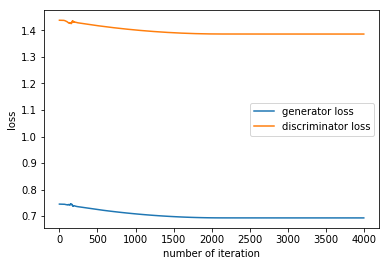

In [35]:
plt.plot(gan.g_loss[:4000])
plt.plot(gan.d_loss[:4000])
plt.legend(['generator loss', 'discriminator loss'])
plt.xlabel('number of iteration')
plt.ylabel('loss')

In [0]:
gen_samples = gan.train_loop(samples, reshape=True)

epoch: 0 	D_loss: 1.522972 	G_loss: 0.8348051 	Total_loss: 2.357777
epoch: 0 	D_loss: 1.5172212 	G_loss: 0.8112381 	Total_loss: 2.3284593
epoch: 1 	D_loss: 1.4884553 	G_loss: 0.7982702 	Total_loss: 2.2867255
epoch: 1 	D_loss: 1.4610885 	G_loss: 0.7679684 	Total_loss: 2.2290568
epoch: 2 	D_loss: 1.4437063 	G_loss: 0.75058615 	Total_loss: 2.1942925
epoch: 2 	D_loss: 1.4250491 	G_loss: 0.7319288 	Total_loss: 2.156978
epoch: 3 	D_loss: 1.4131266 	G_loss: 0.7200064 	Total_loss: 2.133133
epoch: 3 	D_loss: 1.4013833 	G_loss: 0.70826304 	Total_loss: 2.1096463
epoch: 4 	D_loss: 1.394888 	G_loss: 0.70176786 	Total_loss: 2.0966558
epoch: 4 	D_loss: 1.3900785 	G_loss: 0.69695836 	Total_loss: 2.0870368
epoch: 5 	D_loss: 1.3888935 	G_loss: 0.69577336 	Total_loss: 2.0846667
epoch: 5 	D_loss: 1.38872 	G_loss: 0.6955999 	Total_loss: 2.08432
epoch: 6 	D_loss: 1.3886892 	G_loss: 0.695569 	Total_loss: 2.084258
epoch: 6 	D_loss: 1.3886502 	G_loss: 0.69553 	Total_loss: 2.08418
epoch: 7 	D_loss: 1.3886198 	G

In [0]:
from scipy import stats

### lognormal testing

In [0]:
reshaped = gen_samples10.reshape(49980, 10)
tests = [stats.kstest(reshaped[-i], 'lognorm', stats.lognorm.fit(reshaped[-i])) for i in range(100)]

In [40]:
print("D:", np.mean([x[0] for x in tests]), "p_value: ", np.mean([x[1] for x in tests]))

D: 0.23112927795319935 p_value:  0.5959464636373274
